## **Homework #5: K-Nearest Neighbors**
----

## **Description**
In this homework, you will reinforce the concepts related to the **K-Nearest Neighbors algorithm**  through practice problems.




<br>

## **Cheat Sheet**

[K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1kggnJfxf3RS9xyJ-g0VOqV1IWHqfmgs4H6rLVkopU1k/edit?usp=sharing)

####**Before you begin, make sure to import your libraries!**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler # Useful for scaling/normalizing our data. You do not need to know this


### **Life Expectancy by Continent**
---
For the following exercise, we will use a dataset that maps life expectancy around the world. Explore the dataset and get familiar with the data before proceeding. 

<br>

### **Goal**

With KNN, you will use the overall life expectancy, as well as the male and female life expectancy of new datapoints, to determine which continent the data might belong to.**

#### **Step \#1: Load the data**
---
Run the given code to load and view your data frame.

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1z5WPTM4Rge-8U4Dq11Jh9JmNxDAbMrel/edit?usp=sharing&ouid=117761513509433635335&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
life_expectancy_df = pd.read_excel(url)



#### **Step \#2: Decide independent and dependent variables**
---
Use the dataframe `life_expectancy_df` and subset your data into `inputs` and `output`.

<br>

The `inputs` will be `Overall Life`,	`Male Life`, and `Female Life`.

The `output` will be `Continent`.

In [ ]:
inputs = life_expectancy_df[["Overall Life", "Male Life", "Female Life"]]
output = life_expectancy_df[['Continent']]

#### **Step \#3: Split the data into train and test data**
---
Split your data into training and testing data. Reserve 20% of the data for testing. Set the **random_state** parameter to **42**.

**Hint**: Use `train_test_split` method from `sklearn` library.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

#### **Step \#4: Import your model**
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### **Step \#5: Initialize your model**
---
Build your model with $K=5$

**Hint**: Use `KNeighborsClassifier()` method from `sklearn` library.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors= 5)

#### **Step \#6: Fit your model and make a prediction**
---
Train your model with the `x_train` and `y_train` training data.

In [ ]:
knn_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

#### **Step \#7: Test the model**


Now, use your model to predict `x_test` 

['Europe' 'Africa' 'Asia' 'Africa' 'Africa' 'Asia' 'South America' 'Asia'
 'Africa' 'Africa' 'Europe' 'Europe' 'Africa' 'Europe' 'Europe'
 'North America' 'Africa' 'South America' 'Africa' 'Asia' 'North America'
 'Europe' 'South America' 'North America' 'Asia' 'Oceania' 'Africa' 'Asia'
 'North America' 'Oceania' 'Africa' 'South America' 'Europe' 'Africa'
 'Asia' 'Asia' 'Asia' 'Europe' 'South America' 'Africa' 'Asia' 'Africa'
 'Africa' 'Europe' 'Asia']


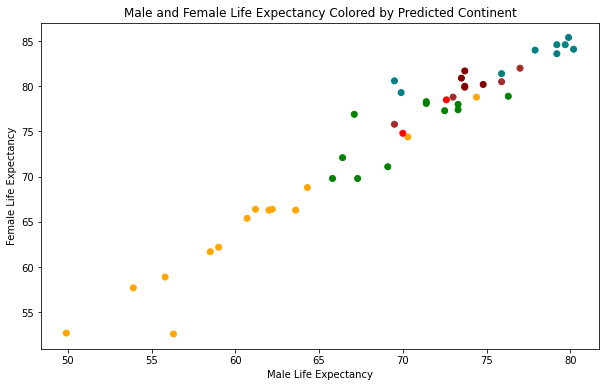

In [ ]:
# Make Predictions
pred = knn_model.predict(x_test)
print(pred)

male = x_test["Male Life"]
female = x_test["Female Life"]


# converting the predictions to colors
continent_to_color = {"Africa": "orange", "Asia": "green", "Europe": "teal", 
                      "North America": "brown", "Oceania": "red", "South America": "maroon"}
pred = [continent_to_color[p] for p in pred]                    


# visualize these predictions
plt.figure(figsize=(10,6))

plt.scatter(male, female, c = pred)

plt.title("Male and Female Life Expectancy Colored by Predicted Continent")
plt.xlabel("Male Life Expectancy")
plt.ylabel("Female Life Expectancy")

plt.show()

#### **Step \#8: Make predictions**
---

**Use the mystery country supplied to predict what continent it is a part of.**


1. The mystery country's data has already been setup below. Use your KNN model to predict the continent:

In [ ]:
mystery_country = pd.DataFrame([[84.65, 87.15, 92.24]], columns = ["Overall Life", "Male Life", "Female Life"])

prediction = knn_model.predict(mystery_country)

print(prediction)

['Asia']


**Use your model and the code from above to predict for the following data points:**

2.  `Overall Life`: 70,   `Male Life`: 65,   `Female Life`: 86 (`[70, 65, 86]`)
3.  `Overall Life`: 65,   `Male Life`: 64,   `Female Life`: 68 (`[65, 64, 68]`)
4.  `Overall Life`: 80,   `Male Life`: 74,   `Female Life`: 80 (`[80, 74, 80]`)

In [ ]:
# 2.
country_1 = pd.DataFrame([[70, 65, 86]], columns = ["Overall Life", "Male Life", "Female Life"])
pred1 = knn_model.predict(country_1)
print(pred1)

['Asia']


In [ ]:
# 3.
country_2 = pd.DataFrame([[65, 64, 68]], columns = ["Overall Life", "Male Life", "Female Life"])
pred2 = knn_model.predict(country_2)
print(pred2)

['Africa']


In [ ]:
# 4.
country_3 = pd.DataFrame([[80, 74, 80]], columns = ["Overall Life", "Male Life", "Female Life"])
pred3 = knn_model.predict(country_3)
print(pred3)

['North America']


### **Classifying Stars**
---
For the following exercise, we will use a dataset that contains data collected by astronomers about different classes of stars that have been observed. Explore the dataset and get familiar with the data before proceeding.


<br>

### **Goal**

With KNN, you will use the size and temperature of stars to determine which class they may be.


<br><br>

***Side Note***: For reference, the classes of stars we are classifying are given below. If you are interested in this topic, feel free to do some research on these different categories of stars!

0: Red Dwarf

1: Brown Dwarf

2: White Dwarf

3: Main Sequence

4: SuperGiants

5: HyperGiants

#### **Step \#1: Load the data**
---
Run the given code to load and view your data frame.

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCZgoegOHa49SFXYU-ZZTdCkgTp0sneU1BsEOa7vusjTXPPLcn0i3kXhX1nyqkApJHCKTkw0mWuWr4/pub?gid=753880827&single=true&output=csv'
stars_df = pd.read_csv(url)

stars_df.shape

(240, 5)

#### **Step \#2: Decide independent and dependent variables**
---
Use the dataframe `stars_df` and subset your data into `inputs` and `output`.

<br>

The `inputs` will be `size` and `temperature`.

The `output` will be `class`.

In [ ]:
inputs = stars_df[["size", "temperature"]]
output = stars_df["class"]

#### **Step \#3: Split the data into train and test data**
---
Let's split your data into training and testing data. Since this is a small dataset, let's just reserve 10% of the data for testing. Set the **random_state** parameter to **42**.

**Hint**: Use `train_test_split` method from `sklearn` library.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

#### **Step \#4: Import your model**
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### **Step \#5: Initialize your model**
---
Build your model with $K=7$

**Hint**: Use `KNeighborsClassifier()` method from `sklearn` library.

In [ ]:
starModel = KNeighborsClassifier(n_neighbors= 7)

#### **Step \#6: Fit your model and make a prediction**
---
Train your model with the `x_train` and `y_train` training data.

In [ ]:
starModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#### **Step \#7: Test the model**


Now, use your model to predict `x_test` 

[2 0 3 3 2 5 3 2 0 2 1 4 5 2 5 4 0 1 2 1 0 0 3 3 2 3 1 2 2 2 3 4 2 0 0 0 0
 5 1 5 2 5 2 0 4 0 2 3]


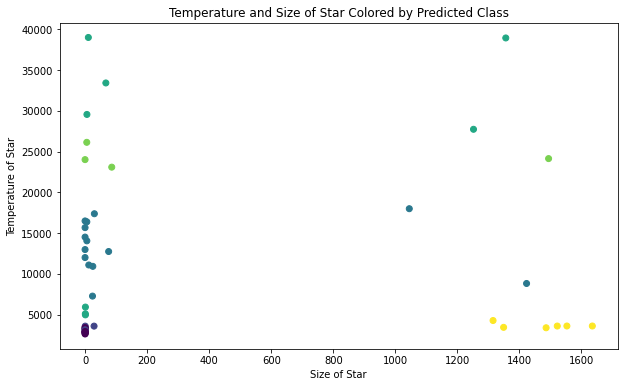

In [ ]:
# Make Predictions
pred2 = starModel.predict(x_test)
print(pred2)

size = x_test["size"]
temp = x_test["temperature"]

# converting the predictions to colors
#planet_to_color = {'0': "red",'1': "brown", '2': "grey", 
 #                     '3': "blue", '4': "orange", '5': "maroon"}
#pred2 = [planet_to_color[p] for p in pred2]  


# visualize these predictions
plt.figure(figsize=(10,6))

plt.scatter(size, temp, c = pred2)

plt.title("Temperature and Size of Star Colored by Predicted Class")
plt.xlabel("Size of Star")
plt.ylabel("Temperature of Star")

plt.show()

#### **Step \#8: Make predictions**
---

Astronomers have heard of your amazing ML model for predicting star types and want you to help them categorize new stars they have observed! For each problem below, use your KNN model to classify the stars based on the data given to you.

	
1. `size`: 708.9, `temperature`: 12100 (`[708.9, 12100]`)

2. `size`: 0.0998, `temperature`:  3484 (`[0.0998, 3484]`)

3. `size`: 6.39, `temperature`:  34190 (`[6.39, 34190]`)

4. `size`: 0.16, `temperature`: 2799 (`[0.16, 2799]`)

In [ ]:
# 1.
star1 = pd.DataFrame([[708.9, 12100]], columns = ["size", "temperature"])
pred1 = knn_model.predict(star1)
print(pred1)

[4]


In [ ]:
# 2.
star2 = pd.DataFrame([[0.0998, 3484]], columns = ["size", "temperature"])
pred2 = knn_model.predict(star2)
print(pred2)

[0]


In [ ]:
# 3.
star3 = pd.DataFrame([[6.39, 34190]], columns = ["size", "temperature"])
pred3 = knn_model.predict(star3)
print(pred3)

[3]


In [ ]:
# 4.
star4 = pd.DataFrame([[0.16, 2799]], columns = ["size", "temperature"])
pred4 = knn_model.predict(star4)
print(pred4)

[0]


---
###© 2022 The Coding School, All rights reserved